In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thermoextrap.ig import IGmodel
from thermoextrap.xtrapy.core import InterpModel
from thermoextrap.xtrapy import xpan_beta
from thermoextrap.xtrapy import recursive_interp

In [2]:
betavals = np.arange(0.1, 10.0, 0.5)

mIG = IGmodel(nParticles=1000)

In [3]:
from importlib import reload

# reload(recursive_interp)


Interpolating from points 0.100000 and 9.600000
Recursion depth on this branch: 0
Maximum bootstrapped error within interval: 0.006693
Selected new extrapolation point: 4.753061


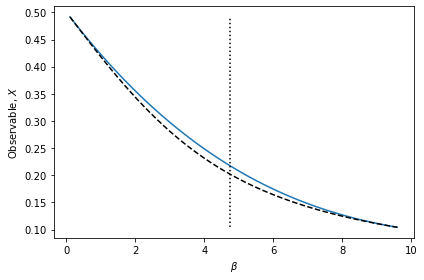


Interpolating from points 0.100000 and 4.753061
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.002329
No additional extrapolation points necessary on this interval.


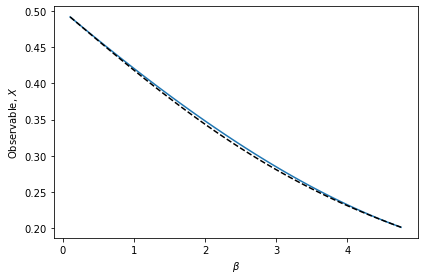


Interpolating from points 4.753061 and 9.600000
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.002455
No additional extrapolation points necessary on this interval.


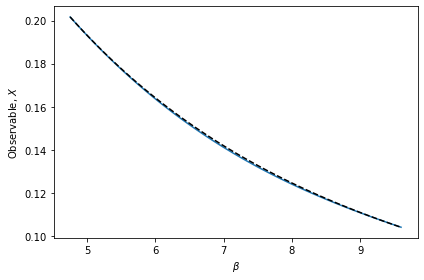

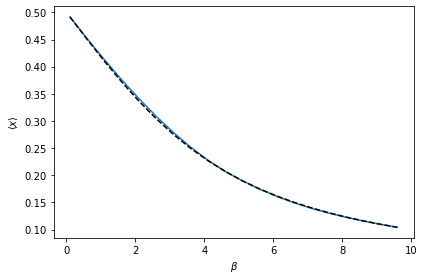

In [4]:
plt.ioff()

#Generate coefficients
coefs = xpan_beta.factory_coefs()

#Create the recursive model
intPpiecewise = recursive_interp.RecursiveInterp(InterpModel, coefs,
                                                 [betavals[0], betavals[-1]],
                                                 maxOrder=1, errTol=0.003)

#Train it recursively until error tolerance reached
#Turn off verbose or doPlot if don't want to see progress of algorithm
#plotCompareFunc provides the true values to compare to in the figure
np.random.seed(42)
intPpiecewise.recursiveTrain(betavals[0], betavals[-1], verbose=True, doPlot=True, plotCompareFunc=mIG.avgX)

#Obtain predictions from our model, which will be based on piecewise interpolating polynomials
intPpredict = intPpiecewise.predict(betavals)

#Plot to compare against true average versus beta for ideal gas model
plt.ion()
interpFig, interpAx = plt.subplots()

interpAx.plot(betavals, intPpredict)
interpAx.plot(betavals, mIG.avgX(betavals), 'k--', zorder=3)

interpAx.set_ylabel(r'$\langle x \rangle$')
interpAx.set_xlabel(r'$\beta$')

interpFig.tight_layout()

plt.show()

In [5]:
intPpiecewise.sequentialTrain([2.5, 7.5], verbose=True)


Interpolating from points 0.100000 and 2.500000
Maximum bootstrapped error within interval: 0.001113
At point: 1.373469

Interpolating from points 2.500000 and 4.753061
Maximum bootstrapped error within interval: 0.001089
At point: 3.419617

Interpolating from points 4.753061 and 7.500000
Maximum bootstrapped error within interval: 0.001338
At point: 5.762141

Interpolating from points 7.500000 and 9.600000
Maximum bootstrapped error within interval: 0.000677
At point: 8.271429


Interval with edges [0.1        2.5        4.75306122] (indices [0 1 2]):
	P-values between regions:
[0.97861807 0.99906219 0.99999415 0.99999895]
	P-values for full and 1 :
[0.09494636 0.21505965 0.97540201 0.99702904]
	P-values for full and 2 :
[0.97846345 0.99887668 0.99977972 0.999881  ]
Interval with edges [2.5        4.75306122 7.5       ] (indices [1 2 3]):
	P-values between regions:
[0.37553362 0.41727297 0.41871656 0.38826451]
	P-values for full and 1 :
[0.17878952 0.21222505 0.24692956 0.26307335]
	P-values for full and 2 :
[0.31759552 0.3551746  0.37580741 0.38622669]
Interval with edges [4.75306122 7.5        9.6       ] (indices [2 3 4]):
	P-values between regions:
[0.98118809 0.98372184 0.98256629 0.97612887]
	P-values for full and 1 :
[0.43490486 0.47822385 0.5180128  0.53958755]
	P-values for full and 2 :
[0.97542167 0.9798468  0.98230479 0.98357373]


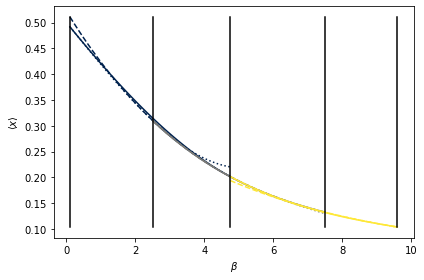

In [6]:
#Can also check for consistency of local curvature
#Not implemented as an "optimization" rule in the recursive interpolation procedure
#But do have function to do statistical and visual check

#Using the model we just trained above, so must run cell above before this one
checkPvals = intPpiecewise.checkPolynomialConsistency(doPlot=True)

In [7]:
from thermoextrap import interp
import thermoextrap.recursive_interp as orig_recursive_interp


Interpolating from points 0.100000 and 9.600000
Recursion depth on this branch: 0
Maximum bootstrapped error within interval: 0.006629
Selected new extrapolation point: 4.559184


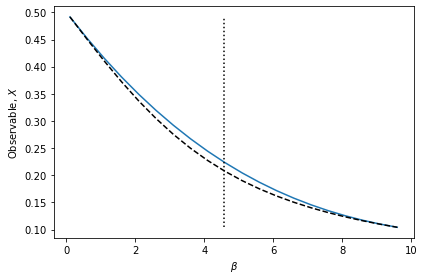


Interpolating from points 0.100000 and 4.559184
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.002181
No additional extrapolation points necessary on this interval.


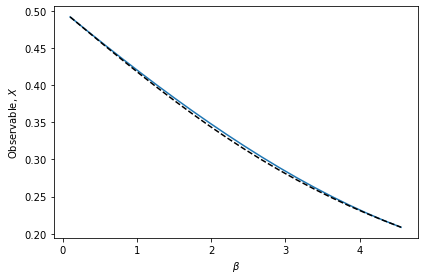


Interpolating from points 4.559184 and 9.600000
Recursion depth on this branch: 1
Maximum bootstrapped error within interval: 0.002513
No additional extrapolation points necessary on this interval.


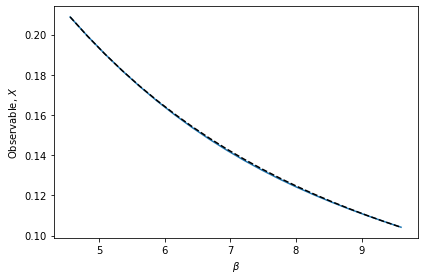

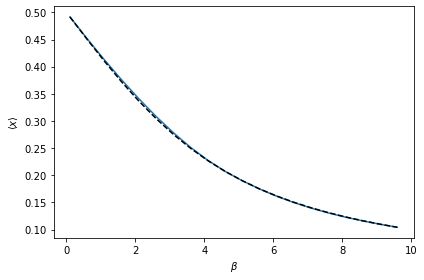

In [8]:
plt.ioff()

#Now want to look at recursive interpolation procedure
#Will only use polynomial interpolation model here
iModelPoly = interp.InterpModel(maxOrder=1)

#Create the recursive model
orig_intPpiecewise = orig_recursive_interp.RecursiveInterp(iModelPoly,
                                                           [betavals[0], betavals[-1]],
                                                           maxOrder=1, errTol=0.003)

#Train it recursively until error tolerance reached
#Turn off verbose or doPlot if don't want to see progress of algorithm
#plotCompareFunc provides the true values to compare to in the figure
np.random.seed(42)
orig_intPpiecewise.recursiveTrain(betavals[0], betavals[-1], verbose=True, doPlot=True, plotCompareFunc=mIG.avgX)

#Obtain predictions from our model, which will be based on piecewise interpolating polynomials
orig_intPpredict = orig_intPpiecewise.predict(betavals)[:,0]

#Plot to compare against true average versus beta for ideal gas model
plt.ion()
interpFig, interpAx = plt.subplots()

interpAx.plot(betavals, orig_intPpredict)
interpAx.plot(betavals, mIG.avgX(betavals), 'k--', zorder=3)

interpAx.set_ylabel(r'$\langle x \rangle$')
interpAx.set_xlabel(r'$\beta$')

interpFig.tight_layout()

plt.show()

In [9]:
orig_intPpiecewise.sequentialTrain([2.5, 7.5], verbose=True)


Interpolating from points 0.100000 and 2.500000
Maximum bootstrapped error within interval: 0.001132
At point: 1.373469

Interpolating from points 2.500000 and 4.559184
Maximum bootstrapped error within interval: 0.001130
At point: 3.466556

Interpolating from points 4.559184 and 7.500000
Maximum bootstrapped error within interval: 0.001439
At point: 5.759517

Interpolating from points 7.500000 and 9.600000
Maximum bootstrapped error within interval: 0.000684
At point: 8.314286


Interval with edges [0.1        2.5        4.55918367] (indices [0 1 2]):
	P-values between regions:
[[0.15701247]
 [0.46345775]
 [0.95736662]
 [0.99973502]]
	P-values for full and 1 :
[[0.11213806]
 [0.25693442]
 [0.99206828]
 [0.99986639]]
	P-values for full and 2 :
[[0.15911696]
 [0.4220807 ]
 [0.6738589 ]
 [0.77618343]]
Interval with edges [2.5        4.55918367 7.5       ] (indices [1 2 3]):
	P-values between regions:
[[0.1452714 ]
 [0.56119886]
 [0.78710997]
 [0.87253836]]
	P-values for full and 1 :
[[0.70077163]
 [0.78441817]
 [0.85440188]
 [0.89162384]]
	P-values for full and 2 :
[[0.42331733]
 [0.28580983]
 [0.18993119]
 [0.12195764]]
Interval with edges [4.55918367 7.5        9.6       ] (indices [2 3 4]):
	P-values between regions:
[[0.93363809]
 [0.93788908]
 [0.93372544]
 [0.91720733]]
	P-values for full and 1 :
[[0.27050509]
 [0.30592786]
 [0.33992605]
 [0.35700128]]
	P-values for full and 2 :
[[0.9231768 ]
 [0.92937988]
 [0.93207647]
 [0.9324086 ]]


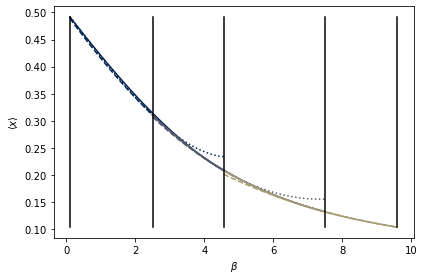

In [10]:
checkPvals = orig_intPpiecewise.checkPolynomialConsistency(doPlot=True)